In [1]:
import pandas as pd
import os
import sys
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Get the absolute path of 'src'
sys.path.append(os.path.abspath("../src"))

# Ensure this points to the correct JSON key file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = (
    "../src/config/manga-recommender-system-d0a04ad1ff87.json"
)

# Verify authentication
client = bigquery.Client()
print(f"Authenticated project: {client.project}")

Authenticated project: manga-recommender-system


In [3]:
from utils.bigquery_utils import load_data_from_bigquery

# Load data from BigQuery
manga_df = load_data_from_bigquery(
    dataset_id="manga_dataset", table_id="manga_collection_raw"
)

2025-02-26 19:14:57.131 | INFO     | utils.bigquery_utils:load_data_from_bigquery:46 - Successfully loaded 12500 rows from manga-recommender-system.manga_dataset.manga_collection_raw


In [4]:
manga_df

,ID,Title Romaji,Title English,Genres,Description,Average Score,Popularity,Status,Chapters,Volumes,Cover Image,Tags,Start Date,End Date,Is Adult,Ranking,Relations,Mangaka,Reviews
0,30002,Berserk,Berserk,"Action, Adventure, Drama, Fantasy, Horror, Psy...","His name is Guts, the Black Swordsman, a feare...",93.0,199722,RELEASING,NaN,NaN,https://s4.anilist.co/file/anilistcdn/media/ma...,"Tragedy, Seinen, Revenge, Male Protagonist, De...",1989.0,NaN,False,"1 (RATED - MANGA), 5 (POPULAR - MANGA)","Kenpuu Denki Berserk (ADAPTATION), Berserk: Ou...","Kentarou Miura, Kouji Mori",85 - This would be the first time i try tackli...
1,30007,Hajime no Ippo,Hajime no Ippo: Fighting Spirit!,"Action, Comedy, Drama, Sports",Makunouchi Ippo has been bullied his entire li...,87.0,28678,RELEASING,NaN,NaN,https://s4.anilist.co/file/anilistcdn/media/ma...,"Boxing, Shounen, Male Protagonist, Primarily M...",1989.0,NaN,False,"31 (RATED - MANGA), 192 (POPULAR - MANGA)","Hajime no Ippo: Champion Road (ADAPTATION), Ha...","George Morikawa, Kentarou Miura, Yuuji Ninomiya","100 - Hajime no Ippo, the best Sports manga of..."
2,30013,ONE PIECE,One Piece,"Action, Adventure, Comedy, Fantasy","As a child, Monkey D. Luffy was inspired to be...",91.0,191720,RELEASING,NaN,NaN,https://s4.anilist.co/file/anilistcdn/media/ma...,"Pirates, Travel, Found Family, Shounen, Ensemb...",1997.0,NaN,False,"4 (RATED - MANGA), 6 (POPULAR - MANGA), 1 (RAT...",ONE PIECE: Episode of Nami - Koukaishi no Nami...,"Eiichirou Oda, Yuusaku Shibata, Tatsuma Eijiri...",100 - One Piece is THE Phenomenal Piece of Fic...
3,30024,D.Gray-man,D.Gray-man,"Action, Adventure, Fantasy","A born exorcist, Walker's primary anti-akuma w...",81.0,35336,RELEASING,NaN,NaN,https://s4.anilist.co/file/anilistcdn/media/ma...,"Demons, Amnesia, Tragedy, Found Family, Super ...",2004.0,NaN,False,"265 (RATED - MANGA), 138 (POPULAR - MANGA), 3 ...","D.Gray-man (ADAPTATION), Zone (ALTERNATIVE), D...","Katsura Hoshino, Kenichi Kondou, Nichou-me no ...","100 - Never stop, keep on walking, 95 - ""I swe..."
4,30026,HUNTER×HUNTER,Hunter x Hunter,"Action, Adventure, Comedy, Fantasy","Gon might be a country boy, but he has high as...",88.0,89451,RELEASING,NaN,NaN,https://s4.anilist.co/file/anilistcdn/media/ma...,"Shounen, Super Power, Cultivation, Ensemble Ca...",1998.0,NaN,False,"22 (RATED - MANGA), 24 (POPULAR - MANGA), 2 (R...","HUNTER×HUNTER (ADAPTATION), HUNTER×HUNTER OVA ...","Yoshihiro Togashi, Naoko Takeuchi, Katsunori M...","91 - A Review of Mid x Mid, 70 - Far From Perf..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,31605,Shoukoku no Altair,Altair: A Record of Battles,"Adventure, Drama, Fantasy",For generations the Torqye Pashalu and the Bal...,75.0,4881,FINISHED,165.0,27.0,https://s4.anilist.co/file/anilistcdn/media/ma...,"War, Historical, Foreign, Politics, Military, ...",2007.0,2023.0,False,"35 (RATED - MANGA), 41 (POPULAR - MANGA)","Shoukoku no Altair (ADAPTATION), Anastasia no ...",Kotono Katou,None
12496,44997,Tiara,None,"Drama, Fantasy, Romance",Prashian is an aristocratic line gifted with 5...,NaN,225,FINISHED,253.0,35.0,https://s4.anilist.co/file/anilistcdn/media/ma...,"Female Protagonist, Full Color",2009.0,2023.0,False,None,None,None,None
12497,35685,Hakkenden,Hakkenden,"Action, Fantasy, Supernatural","Five years ago, almost every villager of Ootsu...",64.0,789,RELEASING,NaN,NaN,https://s4.anilist.co/file/anilistcdn/media/ma...,"Shoujo, Male Protagonist",2005.0,2024.0,False,None,Hakkenden: Touhou Hakken Ibun (ADAPTATION),Miyuki Abe,None
12498,41854,Mutsu Enmei-ryuu Gaiden: Shura no Toki,None,"Action, Drama",Legends tell of an invincible martial art know...,NaN,142,FINISHED,55.0,22.0,https://s4.anilist.co/file/anilistcdn/media/ma...,"Shounen, Historical",1989.0,2024.0,False,None,Mutsu Enmei Ryuu Gaiden: Shura no Toki (ADAPTA...,None,None


In [5]:
manga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             12500 non-null  Int64  
 1   Title Romaji   12500 non-null  object 
 2   Title English  4249 non-null   object 
 3   Genres         10908 non-null  object 
 4   Description    12395 non-null  object 
 5   Average Score  5012 non-null   float64
 6   Popularity     12500 non-null  Int64  
 7   Status         12500 non-null  object 
 8   Chapters       10361 non-null  float64
 9   Volumes        11066 non-null  float64
 10  Cover Image    12500 non-null  object 
 11  Tags           11794 non-null  object 
 12  Start Date     11702 non-null  float64
 13  End Date       8488 non-null   float64
 14  Is Adult       12500 non-null  boolean
 15  Ranking        2047 non-null   object 
 16  Relations      3669 non-null   object 
 17  Mangaka        8306 non-null   object 
 18  Review

In [6]:
manga_df.duplicated().sum()

0

In [7]:
manga_df.isna().sum()

ID                   0
Title Romaji         0
Title English     8251
Genres            1592
Description        105
Average Score     7488
Popularity           0
Status               0
Chapters          2139
Volumes           1434
Cover Image          0
Tags               706
Start Date         798
End Date          4012
Is Adult             0
Ranking          10453
Relations         8831
Mangaka           4194
Reviews          11989
dtype: int64

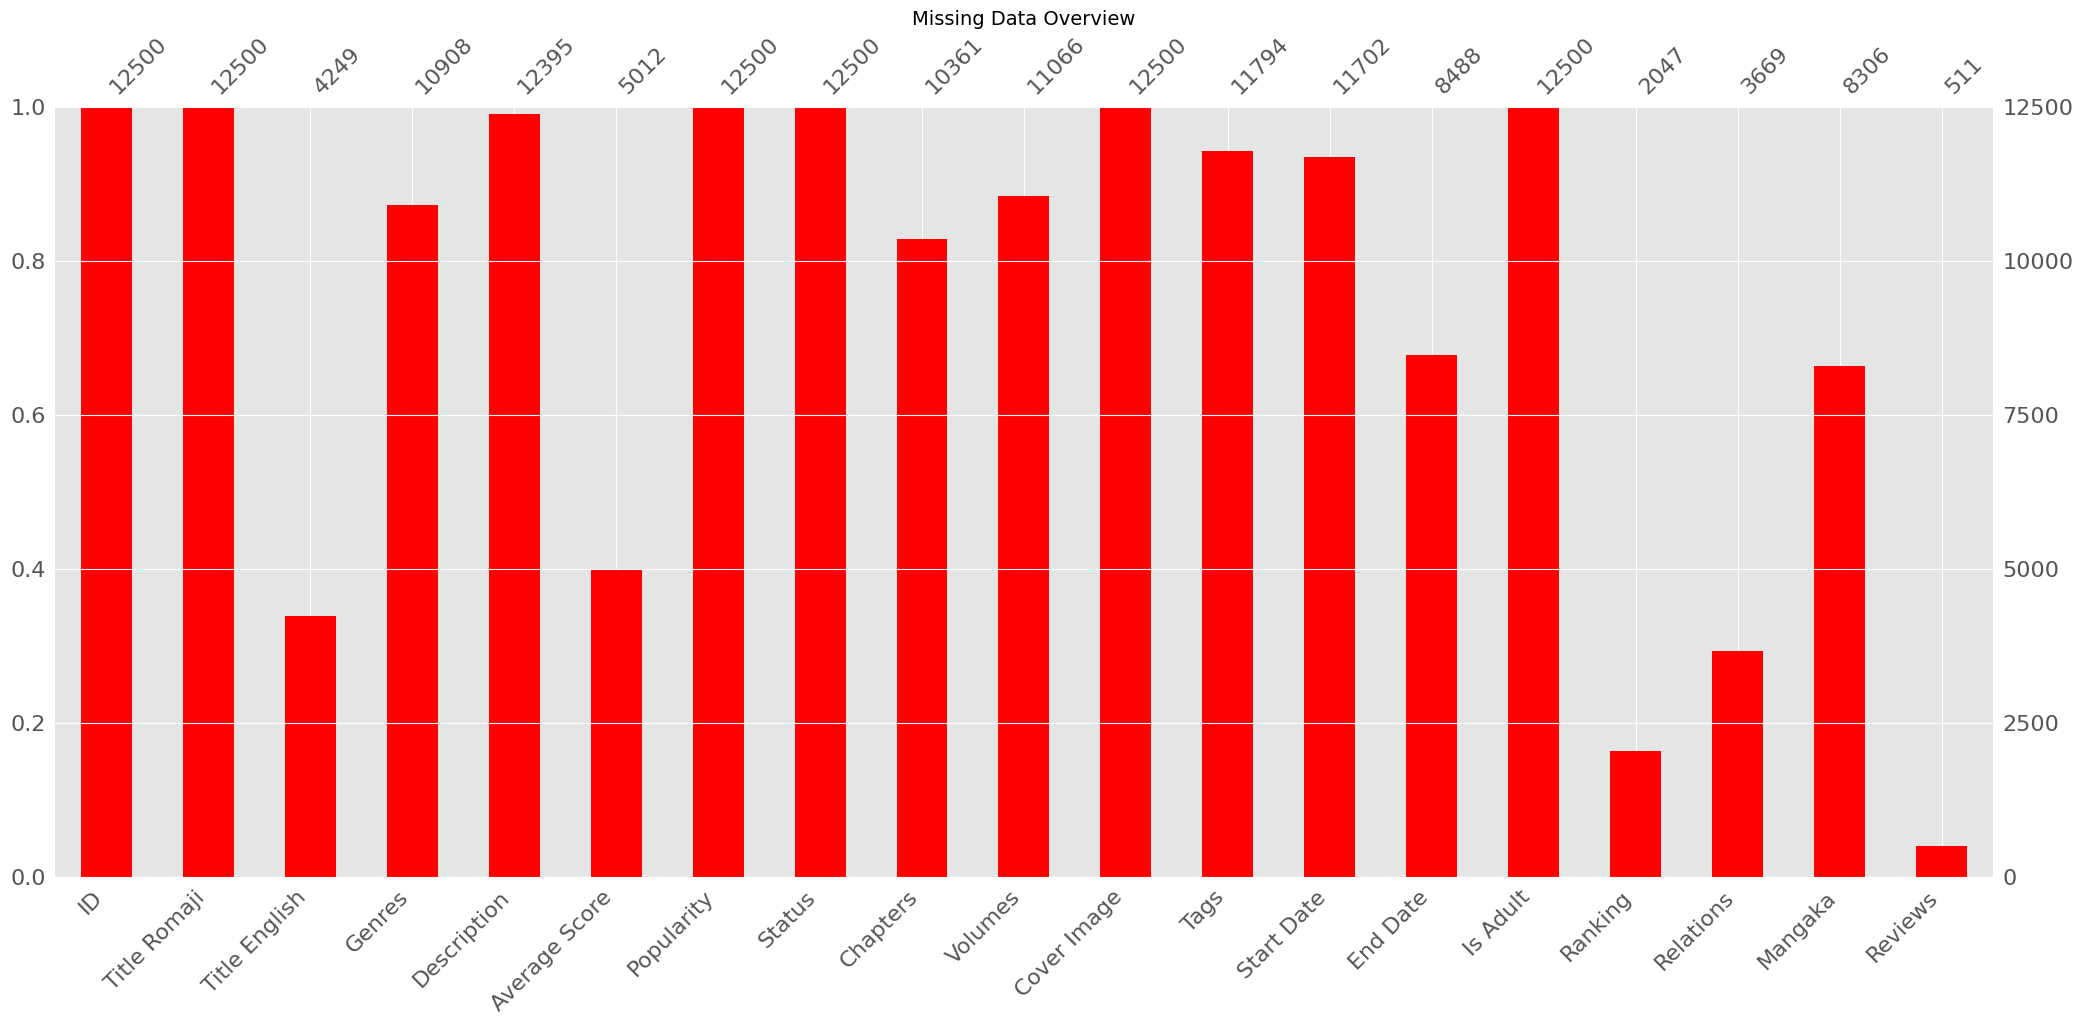

In [8]:
# Set style for plots
plt.style.use("ggplot")

# Missing values visualization
plt.figure(figsize=(12, 6))
msno.bar(manga_df, color="red")
plt.title("Missing Data Overview", fontsize=14)
plt.show()

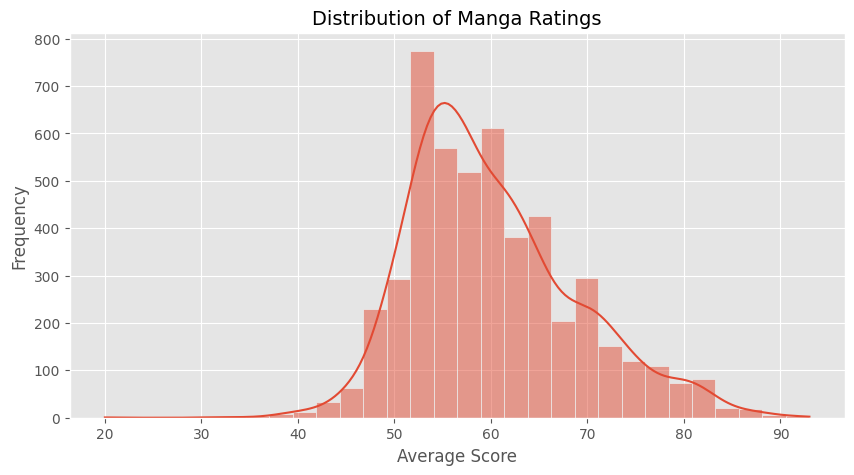

In [9]:
# Distribution of Average Scores
plt.figure(figsize=(10, 5))
sns.histplot(manga_df["Average Score"].dropna(), bins=30, kde=True)
plt.title("Distribution of Manga Ratings", fontsize=14)
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()

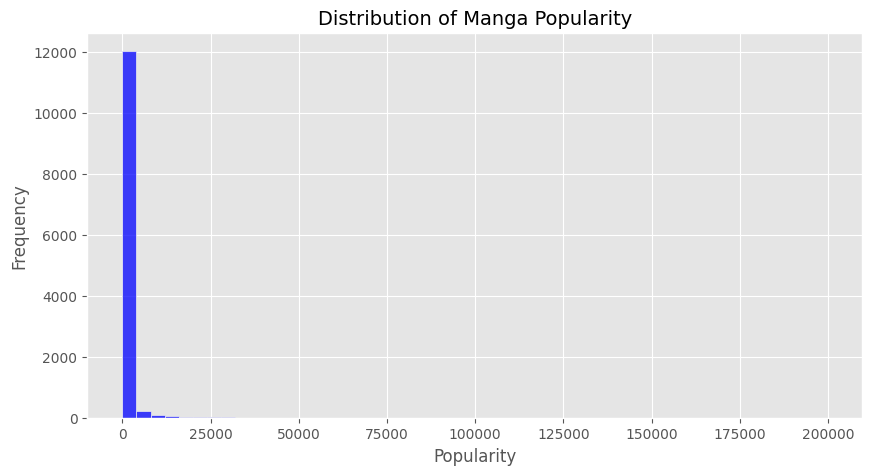

In [10]:
# Plot: Distribution of Popularity
plt.figure(figsize=(10, 5))
sns.histplot(manga_df["Popularity"].astype(float), bins=50, color="blue")
plt.title("Distribution of Manga Popularity", fontsize=14)
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

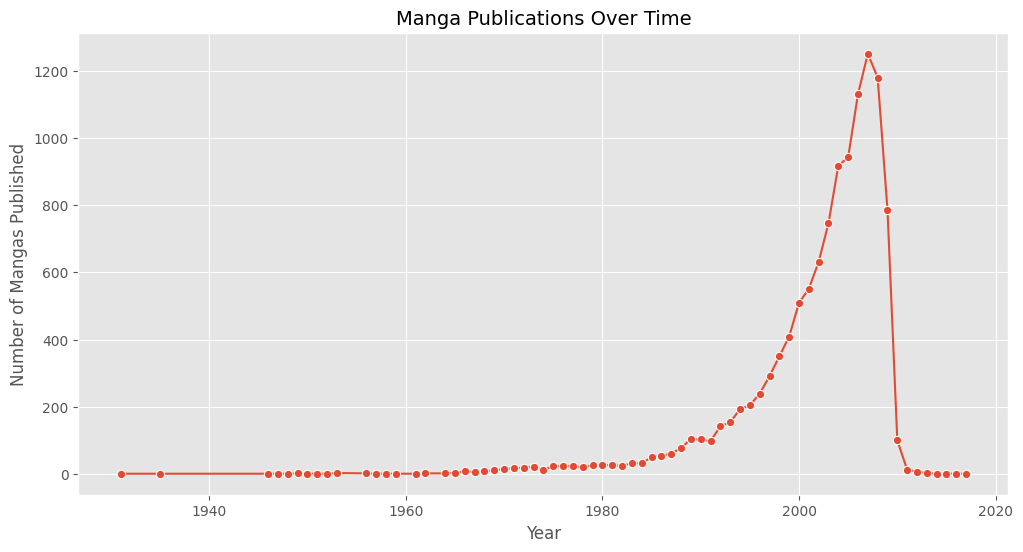

In [11]:
# Analyzing publication trends over time
plt.figure(figsize=(12, 6))

# Drop missing values in Start Date and convert to int
manga_df["Start Date"] = manga_df["Start Date"].dropna().astype(int)

# Count number of mangas published per year
publication_trends = manga_df["Start Date"].value_counts().sort_index()

# Plot: Manga publications over time
sns.lineplot(x=publication_trends.index, y=publication_trends.values, marker="o")
plt.title("Manga Publications Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Mangas Published")
plt.show()

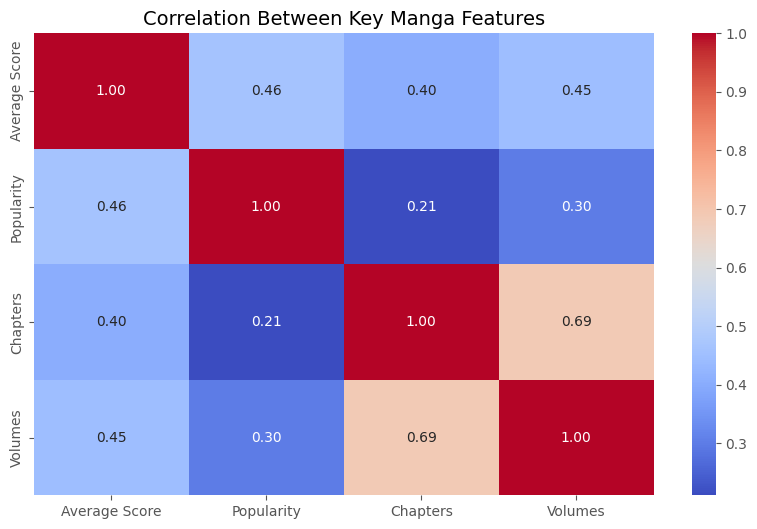

In [12]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(
    manga_df[["Average Score", "Popularity", "Chapters", "Volumes"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Correlation Between Key Manga Features", fontsize=14)
plt.show()

# User Statistics

In [34]:
# Load data from BigQuery
user_stats_df = load_data_from_bigquery(
    dataset_id="users_dataset", table_id="user_statistics_raw"
)

2025-02-26 19:18:31.544 | INFO     | utils.bigquery_utils:load_data_from_bigquery:46 - Successfully loaded 25075 rows from manga-recommender-system.users_dataset.user_statistics_raw


In [35]:
user_stats_df

,Username,User ID,Total Manga Read,Total Chapters Read,Total Volumes Read,Mean Score Given,Score Standard Deviation,Favorite Genres,Most Read Years,Tag Preferences,Staff Preferences,Preferred Manga Lengths
0,alanc2113,6811576.0,0,0,0,0.00,0.0,None,None,None,None,None
1,DaB1gEggy,5879304.0,0,0,0,0.00,0.0,None,None,None,None,None
2,timodavid,7171380.0,0,0,0,0.00,0.0,None,None,None,None,None
3,Jivam,7132115.0,0,0,0,0.00,0.0,None,None,None,None,None
4,MarmotteLambda,7178739.0,0,0,0,0.00,0.0,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
25070,Ez647,NaN,4,1692,30,70.00,52.0,"Action (4), Comedy (2), Adventure (1), Fantasy...",None,"Male Protagonist (4 manga, 70 avg score, 1689 ...","Eiichirou Oda (1 manga, 100 avg score, 1136 ch...",None
25071,Ironmanash,NaN,1562,103450,3279,70.00,52.0,"Comedy (710), Fantasy (786), Drama (547), Roma...",None,"Male Protagonist (544 manga, 100 avg score, 49...","Takanori Asada (3 manga, 0 avg score, 1884 cha...",None
25072,khoalek,NaN,956,20988,425,67.67,56.0,"Comedy (652), Romance (607), Slice of Life (29...",None,"Male Protagonist (406 manga, 3 avg score, 1219...","Kouji Seo (9 manga, 0 avg score, 812 chapters)...",None
25073,Hebaccio,NaN,159,9843,613,67.00,57.2,"Romance (91), Comedy (82), Slice of Life (45),...",None,"Male Protagonist (97 manga, 50.5 avg score, 84...","Tite Kubo (4 manga, 0 avg score, 709 chapters)...",None


In [36]:
user_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25075 entries, 0 to 25074
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Username                  25075 non-null  object 
 1   User ID                   6024 non-null   float64
 2   Total Manga Read          25075 non-null  Int64  
 3   Total Chapters Read       25075 non-null  Int64  
 4   Total Volumes Read        25075 non-null  Int64  
 5   Mean Score Given          25075 non-null  float64
 6   Score Standard Deviation  25075 non-null  float64
 7   Favorite Genres           22982 non-null  object 
 8   Most Read Years           15608 non-null  object 
 9   Tag Preferences           22982 non-null  object 
 10  Staff Preferences         22970 non-null  object 
 11  Preferred Manga Lengths   15136 non-null  object 
dtypes: Int64(3), float64(3), object(6)
memory usage: 2.4+ MB


In [37]:
user_stats_df.duplicated().sum()

8945

In [38]:
user_stats_df.isna().sum()

Username                        0
User ID                     19051
Total Manga Read                0
Total Chapters Read             0
Total Volumes Read              0
Mean Score Given                0
Score Standard Deviation        0
Favorite Genres              2093
Most Read Years              9467
Tag Preferences              2093
Staff Preferences            2105
Preferred Manga Lengths      9939
dtype: int64

In [ ]:
# Remove users who read 0 manga
user_stats_df = user_stats_df[user_stats_df["Total Manga Read"] > 0]

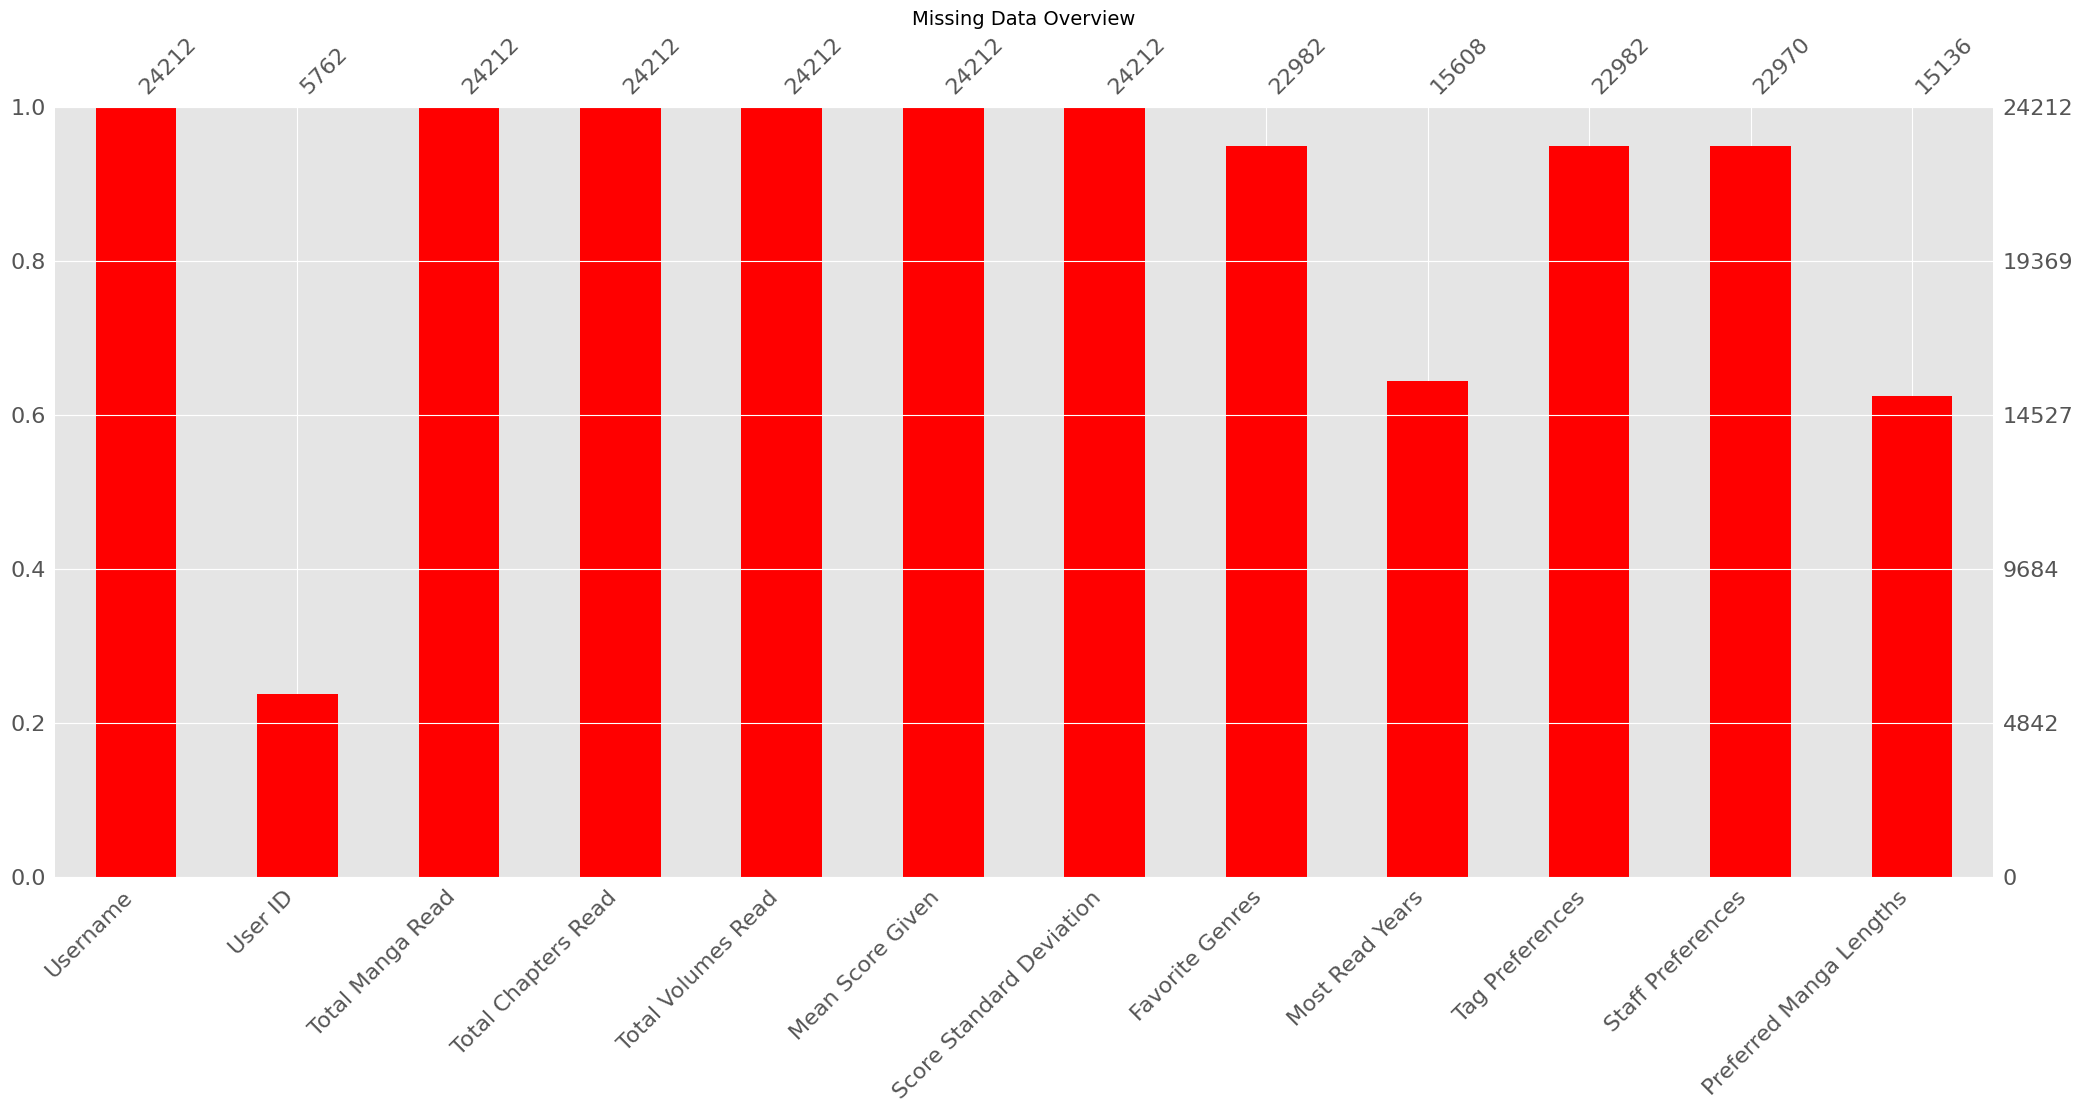

In [20]:
# Set style for plots
plt.style.use("ggplot")

# Missing values visualization
plt.figure(figsize=(12, 6))
msno.bar(user_stats_df, color="red")
plt.title("Missing Data Overview", fontsize=14)
plt.show()

In [21]:
# Impossible to read more than 500 000 volumes
user_stats_df[user_stats_df["Total Volumes Read"] > 500_000]

,Username,User ID,Total Manga Read,Total Chapters Read,Total Volumes Read,Mean Score Given,Score Standard Deviation,Favorite Genres,Most Read Years,Tag Preferences,Staff Preferences,Preferred Manga Lengths
6991,tordyman,5342294.0,26,4481,524553,77.69,17.1,"Action (19), Comedy (10), Drama (12), Adventur...","768 chapters (3 manga, 73.67 avg score), 101 c...","4386 chapters (20 manga, 77.53 avg score), 377...","1569 chapters (2 manga, 80 avg score), 1569 ch...","1827 chapters (8 manga, 76.4 avg score), 1791 ..."
7456,deerangle3,NaN,50,528134,590208,80.61,18.8,"Action (28), Supernatural (20), Drama (27), Fa...","185 chapters (5 manga, 82.5 avg score), 377 ch...","527963 chapters (40 manga, 81.32 avg score), 5...","524559 chapters (2 manga, 40.5 avg score), 136...","526325 chapters (16 manga, 78.54 avg score), 6..."
8469,voxlert,7152843.0,15,12171,524670,59.80,32.8,"Action (9), Comedy (7), Supernatural (7), Slic...","47 chapters (5 manga, 45.4 avg score), 1746 ch...","12001 chapters (12 manga, 59.83 avg score), 12...","8378 chapters (2 manga, 94.5 avg score), 7992 ...","8915 chapters (12 manga, 54.08 avg score), 308..."
15513,tordyman,5342294.0,26,4481,524553,77.69,17.1,"Action (19), Comedy (10), Drama (12), Adventur...","768 chapters (3 manga, 73.67 avg score), 101 c...","4386 chapters (20 manga, 77.53 avg score), 377...","1569 chapters (2 manga, 80 avg score), 1569 ch...","1827 chapters (8 manga, 76.4 avg score), 1791 ..."
15978,deerangle3,NaN,50,528134,590208,80.61,18.8,"Action (28), Supernatural (20), Drama (27), Fa...","185 chapters (5 manga, 82.5 avg score), 377 ch...","527963 chapters (40 manga, 81.32 avg score), 5...","524559 chapters (2 manga, 40.5 avg score), 136...","526325 chapters (16 manga, 78.54 avg score), 6..."
16991,voxlert,7152843.0,15,12171,524670,59.80,32.8,"Action (9), Comedy (7), Supernatural (7), Slic...","47 chapters (5 manga, 45.4 avg score), 1746 ch...","12001 chapters (12 manga, 59.83 avg score), 12...","8378 chapters (2 manga, 94.5 avg score), 7992 ...","8915 chapters (12 manga, 54.08 avg score), 308..."
23562,tordyman,NaN,26,4488,524553,78.41,16.9,"Action (19), Comedy (10), Drama (12), Adventur...",None,"Male Protagonist (20 manga, 77.53 avg score, 4...","Ryou Ishiyama (2 manga, 80 avg score, 1569 cha...",None
24062,deerangle3,NaN,51,528179,590211,80.61,18.8,"Action (28), Supernatural (20), Drama (27), Fa...",None,"Male Protagonist (40 manga, 81.32 avg score, 5...","Ken Wakui (2 manga, 40.5 avg score, 524559 cha...",None


In [22]:
import numpy as np


# Identifying outliers using the IQR (Interquartile Range) method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


# Detect outliers for Total Volumes Read
outliers_volumes, lower_vol, upper_vol = detect_outliers(
    user_stats_df, "Total Volumes Read"
)

# Detect outliers for Total Chapters Read
outliers_chapters, lower_chap, upper_chap = detect_outliers(
    user_stats_df, "Total Chapters Read"
)

# Detect outliers for Total Manga Read
outliers_manga, lower_manga, upper_manga = detect_outliers(
    user_stats_df, "Total Manga Read"
)

# Display number of outliers detected
num_outliers = {
    "Total Volumes Read": len(outliers_volumes),
    "Total Chapters Read": len(outliers_chapters),
    "Total Manga Read": len(outliers_manga),
}

# Display results
num_outliers

{'Total Volumes Read': 1911,
 'Total Chapters Read': 2022,
 'Total Manga Read': 2617}

In [23]:
# Remove outliers from the dataset based on IQR method thresholds
filtered_user_stats_df = user_stats_df[
    (user_stats_df["Total Volumes Read"] <= upper_vol)
    & (user_stats_df["Total Chapters Read"] <= upper_chap)
    & (user_stats_df["Total Manga Read"] <= upper_manga)
]

# Display the new dataset size after outlier removal
new_size = filtered_user_stats_df.shape[0]
original_size = user_stats_df.shape[0]

# Display the number of rows removed
rows_removed = original_size - new_size
new_size, rows_removed

(20878, 3334)

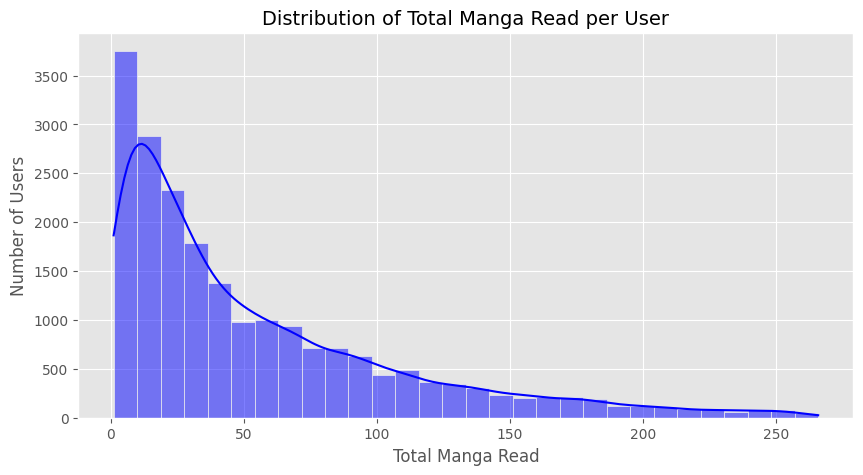

In [24]:
# Plot: Distribution of Total Manga Read
plt.figure(figsize=(10, 5))
sns.histplot(
    filtered_user_stats_df["Total Manga Read"].astype(float),
    bins=30,
    kde=True,
    color="blue",
)
plt.title("Distribution of Total Manga Read per User", fontsize=14)
plt.xlabel("Total Manga Read")
plt.ylabel("Number of Users")
plt.show()

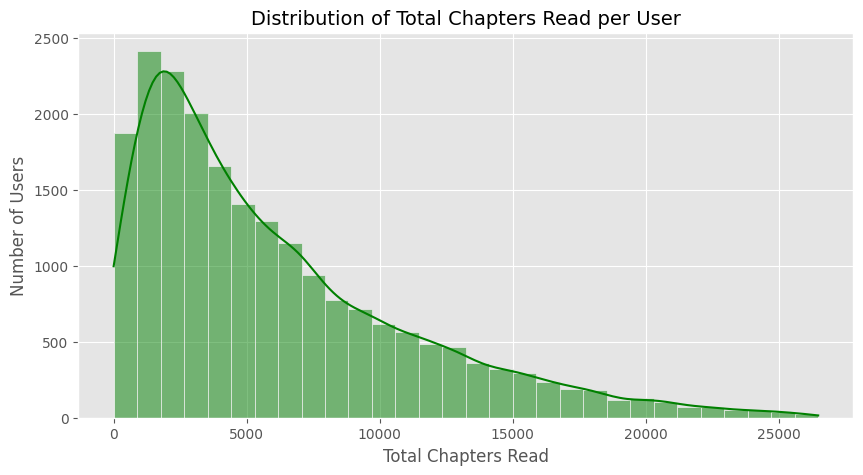

In [25]:
# Plot: Distribution of Total Chapters Read
plt.figure(figsize=(10, 5))
sns.histplot(
    filtered_user_stats_df["Total Chapters Read"].astype(float),
    bins=30,
    kde=True,
    color="green",
)
plt.title("Distribution of Total Chapters Read per User", fontsize=14)
plt.xlabel("Total Chapters Read")
plt.ylabel("Number of Users")
plt.show()

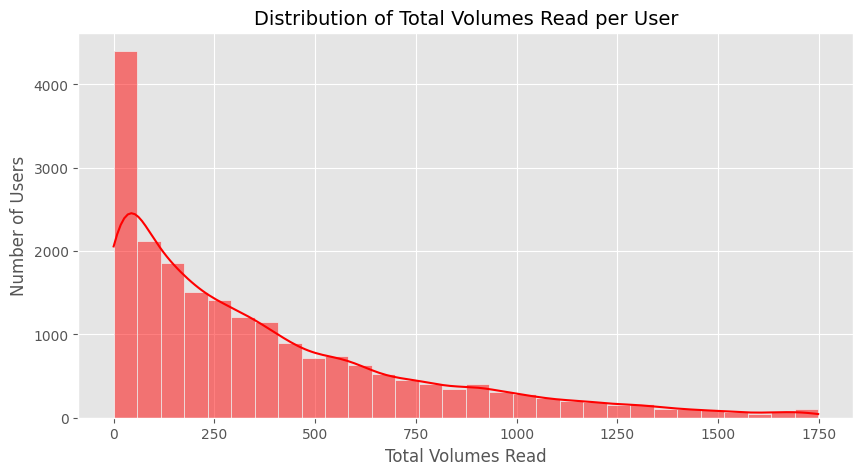

In [26]:
# Plot: Distribution of Total Volumes Read
plt.figure(figsize=(10, 5))
sns.histplot(
    filtered_user_stats_df["Total Volumes Read"].astype(float),
    bins=30,
    kde=True,
    color="red",
)
plt.title("Distribution of Total Volumes Read per User", fontsize=14)
plt.xlabel("Total Volumes Read")
plt.ylabel("Number of Users")
plt.show()

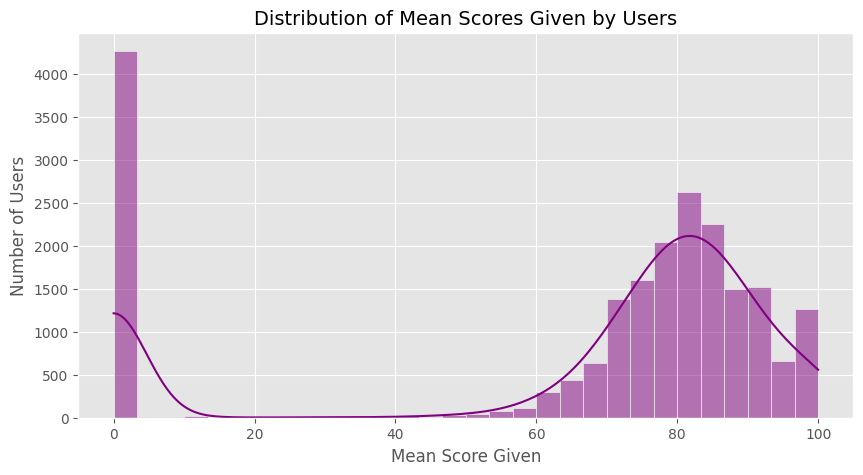

In [27]:
# Plot: Distribution of Mean Scores Given
plt.figure(figsize=(10, 5))
sns.histplot(
    filtered_user_stats_df["Mean Score Given"], bins=30, kde=True, color="purple"
)
plt.title("Distribution of Mean Scores Given by Users", fontsize=14)
plt.xlabel("Mean Score Given")
plt.ylabel("Number of Users")
plt.show()

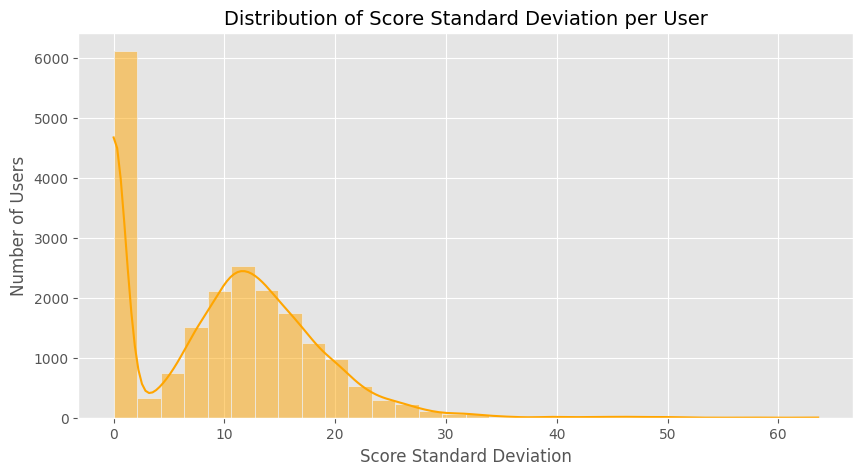

In [28]:
# Plot: Distribution of Score Standard Deviation
plt.figure(figsize=(10, 5))
sns.histplot(
    filtered_user_stats_df["Score Standard Deviation"],
    bins=30,
    kde=True,
    color="orange",
)
plt.title("Distribution of Score Standard Deviation per User", fontsize=14)
plt.xlabel("Score Standard Deviation")
plt.ylabel("Number of Users")
plt.show()

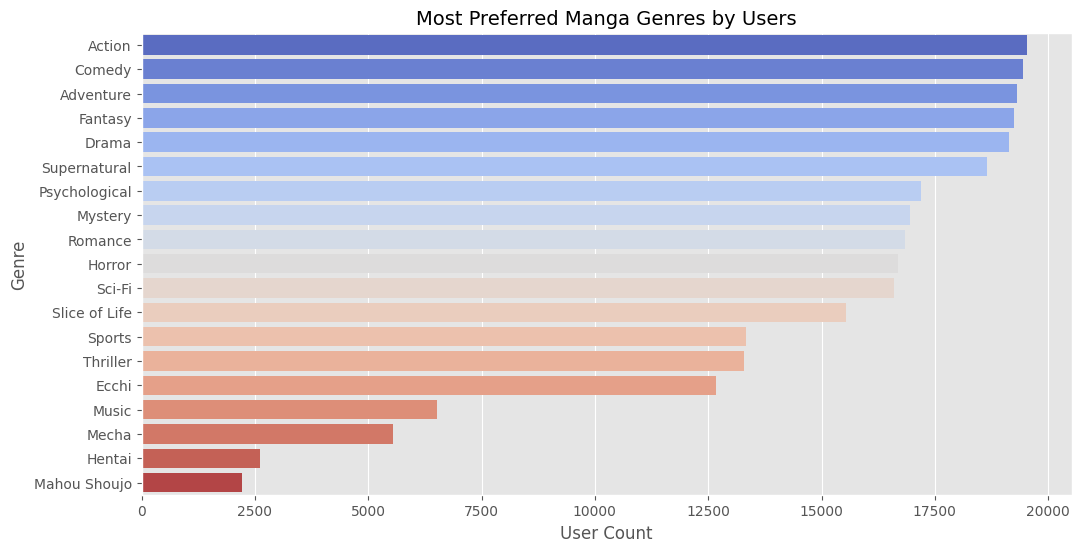

In [29]:
# Extracting and counting favorite genres
from collections import Counter

# Drop missing values in Favorite Genres
genre_data = filtered_user_stats_df["Favorite Genres"].dropna()

# Extract individual genres from structured text
all_user_genres = [
    genre.split(" (")[0] for sublist in genre_data.str.split(", ") for genre in sublist
]
genre_counts = Counter(all_user_genres)

# Convert to DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(
    by="Count", ascending=False
)

# Plot: Most preferred genres by users
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_df["Count"], y=genre_df["Genre"], palette="coolwarm")
plt.title("Most Preferred Manga Genres by Users", fontsize=14)
plt.xlabel("User Count")
plt.ylabel("Genre")
plt.show()

In [30]:
filtered_user_stats_df

,Username,User ID,Total Manga Read,Total Chapters Read,Total Volumes Read,Mean Score Given,Score Standard Deviation,Favorite Genres,Most Read Years,Tag Preferences,Staff Preferences,Preferred Manga Lengths
320,joe66688,7067666.0,1,1139,0,95.00,0.0,None,None,None,None,None
321,Valkuico,540152.0,1,1137,0,0.00,0.0,"Action (1), Adventure (1), Comedy (1), Fantasy...","1137 chapters (1 manga, 0 avg score)","1137 chapters (1 manga, 0 avg score), 1137 cha...","1137 chapters (1 manga, 0 avg score), 1137 cha...",None
322,Subjective0,6905803.0,1,5,1,0.00,0.0,"Action (1), Adventure (1), Comedy (1), Fantasy...","5 chapters (1 manga, 0 avg score)","5 chapters (1 manga, 0 avg score), 5 chapters ...","5 chapters (1 manga, 0 avg score), 5 chapters ...",None
323,zetsubou3,6940823.0,1,75,0,0.00,0.0,None,None,None,None,None
324,ElASara,6877877.0,1,111,0,0.00,0.0,"Action (1), Adventure (1), Comedy (1), Fantasy...","111 chapters (1 manga, 0 avg score)","111 chapters (1 manga, 0 avg score), 111 chapt...","111 chapters (1 manga, 0 avg score), 111 chapt...",None
...,...,...,...,...,...,...,...,...,...,...,...,...
25068,Doyoxx,NaN,63,6082,234,65.00,49.5,None,None,None,None,None
25069,ViniCsn,NaN,5,406,49,59.67,50.5,"Drama (5), Mystery (4), Supernatural (3), Adve...",None,"Seinen (5 manga, 59.67 avg score, 406 chapters...","Naoki Urasawa (1 manga, 0 avg score, 121 chapt...",None
25070,Ez647,NaN,4,1692,30,70.00,52.0,"Action (4), Comedy (2), Adventure (1), Fantasy...",None,"Male Protagonist (4 manga, 70 avg score, 1689 ...","Eiichirou Oda (1 manga, 100 avg score, 1136 ch...",None
25073,Hebaccio,NaN,159,9843,613,67.00,57.2,"Romance (91), Comedy (82), Slice of Life (45),...",None,"Male Protagonist (97 manga, 50.5 avg score, 84...","Tite Kubo (4 manga, 0 avg score, 709 chapters)...",None


In [67]:
# There seems to have been an issue in the fetching as we don't have the tags for all users
filtered_user_stats_df_tags = filtered_user_stats_df.iloc[17268:]
filtered_user_stats_df_tags.head()

,Username,User ID,Total Manga Read,Total Chapters Read,Total Volumes Read,Mean Score Given,Score Standard Deviation,Favorite Genres,Most Read Years,Tag Preferences,Staff Preferences,Preferred Manga Lengths
20624,JHMega,NaN,18,4280,146,89.33,9.6,"Comedy (11), Action (10), Drama (10), Adventur...",None,"Male Protagonist (17 manga, 90 avg score, 4148...","Tatsuya Endou (3 manga, 90 avg score, 515 chap...",None
20625,AnnCobain93,NaN,22,1783,74,79.33,9.6,"Action (11), Drama (16), Fantasy (6), Adventur...",None,"Male Protagonist (16 manga, 85.33 avg score, 1...","Takanori Asada (2 manga, 0 avg score, 730 chap...",None
20626,Firebam2,NaN,23,3244,240,90.33,9.6,"Comedy (10), Drama (13), Fantasy (10), Adventu...",None,"Male Protagonist (17 manga, 86 avg score, 2961...","Takeru Isaka (2 manga, 0 avg score, 1153 chapt...",None
20627,Cosmogony,NaN,23,4431,170,94.07,9.6,"Comedy (14), Action (12), Fantasy (7), Romance...",None,"Male Protagonist (22 manga, 94.07 avg score, 4...","Ken Takano (2 manga, 100 avg score, 1407 chapt...",None
20628,Giaco30,NaN,24,4795,271,82.86,9.6,"Action (15), Adventure (10), Drama (16), Comed...",None,"Tragedy (17 manga, 84.67 avg score, 4502 chapt...","Takahiro Habuta (2 manga, 87.5 avg score, 1531...",None


In [ ]:
import re


# Function to extract only the tag name (removing everything after the first '(')
def clean_tags(tag_series):
    tag_counts = Counter()
    for tag_list in tag_series.dropna().str.split(", "):
        for tag in tag_list:
            clean_tag = tag.split(" (")[0].strip()  # Keep only the text before '('
            if not re.search(
                r"\d+ avg score|\d+ chapters", clean_tag
            ):  # Exclude any numerical values
                tag_counts[clean_tag] += 1
    return tag_counts

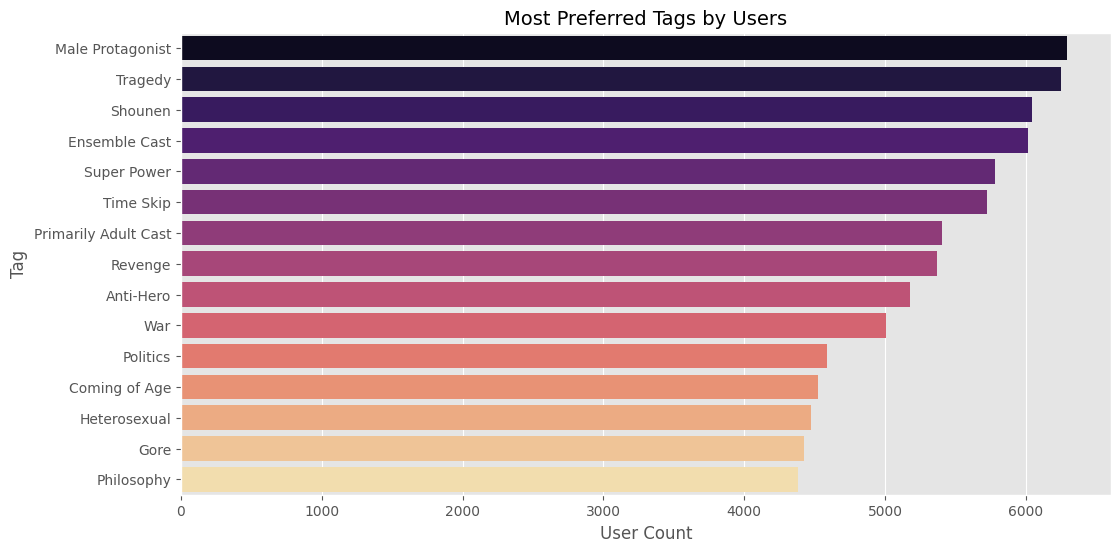

In [65]:
# Extract and clean tag preferences
cleaned_tag_counts = clean_tags(filtered_user_stats_df["Tag Preferences"])

# Convert to DataFrame for visualization
tag_df = pd.DataFrame(cleaned_tag_counts.items(), columns=["Tag", "Count"]).sort_values(
    by="Count", ascending=False
)

# Plot: Most preferred tags by users (Top 15)
plt.figure(figsize=(12, 6))
sns.barplot(x=tag_df["Count"].head(15), y=tag_df["Tag"].head(15), palette="magma")
plt.title("Most Preferred Tags by Users", fontsize=14)
plt.xlabel("User Count")
plt.ylabel("Tag")
plt.show()

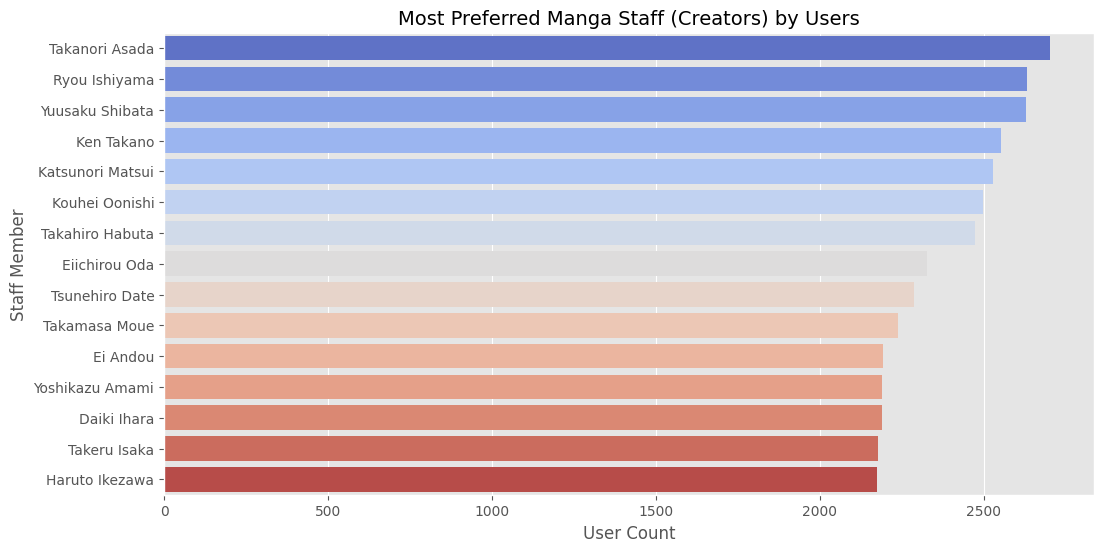

In [66]:
# Extracting and counting staff preferences
staff_counts = clean_tags(filtered_user_stats_df_tags["Staff Preferences"])

# Convert to DataFrame for visualization
staff_df = pd.DataFrame(staff_counts.items(), columns=["Staff", "Count"]).sort_values(
    by="Count", ascending=False
)

# Plot: Most preferred staff by users
plt.figure(figsize=(12, 6))
sns.barplot(
    x=staff_df["Count"].head(15), y=staff_df["Staff"].head(15), palette="coolwarm"
)
plt.title("Most Preferred Manga Staff (Creators) by Users", fontsize=14)
plt.xlabel("User Count")
plt.ylabel("Staff Member")
plt.show()